C:\Users\Stephan\Anaconda2\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning: overflow encountered in long_scalars


TypeError: 'Path3DCollection' object is not iterable

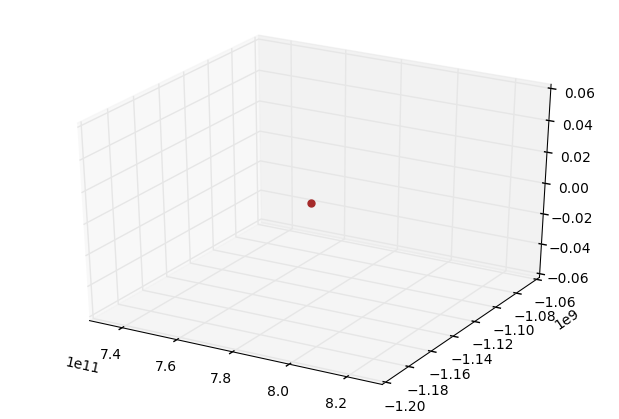

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import pylab as pl
import math
%matplotlib inline


distance_sun_com_with_jupiter = 742000000 # meters, com = center of mass

G = 6.67*10**(-11) #SI units
m_sun = 2*10**30 #kg
m_jup = 1.898*10**27 #kg
AU = 1.496*10**11 #m

dt = 3600*24 #s
N = 10000#unitless
tijd = 10*365 #dag


inner_r = 4 #AU
outer_r = 4.5 #AU
r_max_kwad = outer_r**2 #AU^2
r_min_kwad = inner_r**2 #AU^2

pos_jup_start = np.array([5.2 * AU,0,0]) #m
pos_sun_start = np.array([-distance_sun_com_with_jupiter,0,0]) #m

x_sun, y_sun, z_sun = 0,0,0
x_jup, y_jup, z_jup = pos_jup_start

def sun_start(pos_sun_start):
    x_sun,y_sun,z_sun = pos_sun_start
    theta_sun = math.atan2(y_sun,x_sun)
    d_sun_to_com = np.sqrt(x_sun**2 + y_sun**2)
    v_sun = np.sqrt(G * m_jup/d_sun_to_com)
    vx_sun = v_sun * np.sin(theta_sun)
    vy_sun = -v_sun * np.cos(theta_sun)
    vz_sun = 0
    pos_sun_start = np.array([x_sun, y_sun, z_sun, vx_sun, vy_sun, vz_sun])
    #print pos_sun_start
    return pos_sun_start


def planet_start(pos_planet_start):
    x_planet, y_planet, z_planet = pos_planet_start
    theta_planet = math.atan2(y_planet, x_planet)
    d_planet_to_sun = np.sqrt(x_planet**2 + y_planet**2) #ignoring displacement sun
    v_planet = np.sqrt(G * m_sun/d_planet_to_sun)
    vx_planet = v_planet * np.sin(theta_planet)
    vy_planet = - v_planet * np.cos(theta_planet)
    vz_planet = 0
    pos_planet_start = np.array([x_planet, y_planet, z_planet, vx_planet, vy_planet, vz_planet])
    return pos_planet_start



# They'll go clockwise!
def startvalue_generator(N):
    s = (6,N)
    start_pos_array = np.zeros(s)
    N_succeed = 0
    while N_succeed < N:
        x = random.uniform(-outer_r, outer_r)
        y = random.uniform(-outer_r, outer_r)
        if x**2 + y**2 <= r_max_kwad and x**2 + y**2 >= r_min_kwad:
            x = x * AU
            y = y * AU
            z = 0 #z is uitgezet atm
            d = np.sqrt(x**2 + y**2)
            v = np.sqrt(G*m_sun/d)
            theta = math.atan2(y,x)
            vx = v * np.sin(theta)
            vy = -v * np.cos(theta)
            vz = 0 #z is uitgezet atm
            start_pos = np.array([x, y, z, vx, vy, vz])
            start_pos_array[:,N_succeed] = start_pos
            N_succeed = N_succeed + 1
    return start_pos_array
    
#################### 2D plot starts here ##########################
#N = 1000
#properties = startvalue_generator(N)
#x_list = []
#y_list = []
#z_list = []
#for i in range(N):
#    x = properties[i][0]
#    x_list.append(x*AU)
#    y = properties[i][1]
#    y_list.append(y*AU)
#    z = properties[i][3][0]
#    z_list.append(z*AU)

    

#print 'The number of astroids in this figure = %.5g' % N
#plt.scatter(x_list, y_list, 1, color='black', label='Asteroid')
#plt.scatter([5*AU], [0], 25, color='brown', label='Jupiter')
#plt.scatter([0], [0], 250, color='yellow', label='Sun')
#plt.title('Asteroid belt < 5 AU')
#plt.xlabel('Distance x[m]')
#plt.ylabel('Distance y[m]')
#plt.legend(loc=3, scatterpoints=1)
#plt.show()
#################### 2D plot ends here ##########################


def planet_position(pos_planet):
    planet_x_last, planet_y_last, planet_z_last, planet_vx_last, planet_vy_last, planet_vz_last = pos_planet
    sun_constant = (-G * m_sun)/((np.sqrt((planet_x_last - x_sun)**2 + (planet_y_last - y_sun)**2 + (planet_z_last - z_sun)**2))**3)
    a_x = sun_constant * (planet_x_last - x_sun)
    a_y = sun_constant * (planet_y_last - y_sun)
    a_z = sun_constant * (planet_z_last - z_sun)
    planet_vx_new = planet_vx_last + a_x *dt
    planet_vy_new = planet_vy_last + a_y *dt
    planet_vz_new = planet_vz_last + a_z *dt
    planet_x_new = planet_x_last + planet_vx_new * dt
    planet_y_new = planet_y_last + planet_vy_new * dt
    planet_z_new = planet_z_last + planet_vz_new * dt
    pos_planet = np.array([planet_x_new, planet_y_new, planet_z_new, planet_vx_new, planet_vy_new, planet_vz_new])
    return pos_planet



def sun_position(sun_pos, jup_pos):
    #print sun_pos
    sun_x_last, sun_y_last, sun_z_last, sun_vx_last, sun_vy_last, sun_vz_last = sun_pos
    jup_x_last, jup_y_last, jup_z_last, jup_vx_last, jup_vy_last, jup_vz_last = jup_pos
    jup_constant = (-G * m_jup)/((np.sqrt((sun_x_last - jup_x_last)**2 + (sun_y_last - jup_y_last)**2 + (sun_z_last - jup_z_last)**2))**3)
    a_x = jup_constant * (sun_x_last - jup_x_last)
    a_y = jup_constant * (sun_y_last - jup_y_last)
    a_z = jup_constant * (sun_z_last - jup_z_last)
    sun_vx_new = sun_vx_last + a_x *dt
    sun_vy_new = sun_vy_last + a_y *dt
    sun_vz_new = sun_vz_last + a_z *dt
    sun_x_new = sun_x_last + sun_vx_new * dt
    sun_y_new = sun_y_last + sun_vy_new * dt
    sun_z_new = sun_z_last + sun_vz_new * dt
    sun_pos = np.array([sun_x_new, sun_y_new, sun_z_new, sun_vx_new, sun_vy_new, sun_vz_new])
    return sun_pos

def euler_cromer(pos_array):    
    '''
    Input: 
    Output: 
    How: 
    '''
    x_last, y_last, z_last, vx_last, vy_last, vz_last = pos_array
    sun_constant = (-G * m_sun)/((np.sqrt((x_last - x_sun)**2 + (y_last - y_sun)**2 + (z_last - z_sun)**2))**3)
    jup_constant = (-G * m_jup)/((np.sqrt((x_last - x_jup)**2 + (y_last - y_jup)**2 + (z_last - z_jup)**2))**3)    
    a_x = sun_constant * (x_last - x_sun) + jup_constant * (x_last - x_jup)
    a_y = sun_constant * (y_last - y_sun) + jup_constant * (y_last - y_jup)
    a_z = sun_constant * (z_last - z_sun) + jup_constant * (z_last - z_jup) #z is uitgezet atm    
    vx_new = vx_last + a_x * dt
    vy_new = vy_last + a_y * dt
    vz_new = 0 #z is uitgezet atm    
    x_new = x_last + vx_new * dt
    y_new = y_last + vy_new * dt
    z_new = z_last #z is uitgezet atm    
    new_pos_tuple = np.array([x_new, y_new, z_new, vx_new, vy_new, vz_new])
    return new_pos_tuple

import mpl_toolkits.mplot3d.axes3d as p3

def update(num, data, scatter):
    scatter.set_data(data[:2, :num])
    scatter.set_3d_properties(data[2, :num])
    return scatter

def asteroids(tijd):

    fig = plt.figure()
    ax = p3.Axes3D(fig)
    pos_array = startvalue_generator(N)    
    pos_sun = sun_start(pos_sun_start)
    pos_jup = planet_start(pos_jup_start)
    #merc_x_last, merc_y_last, merc_z_last, v_x_merc, v_y_merc, v_z_merc = planet_start([.39*AU,0,0])
    #ven_x_last, ven_y_last, ven_z_last, v_x_ven, v_y_ven, v_z_ven = planet_start([.72*AU,0,0])
    #earth_x_last, earth_y_last, earth_z_last, v_x_earth, v_y_earth, v_z_earth = planet_start([1.0*AU,0,0])
    #mars_x_last, mars_y_last, mars_z_last, v_x_mars, v_y_mars, v_z_mars = planet_start([1.52*AU,0,0])
    
    
    for t in range(tijd):
        #print pos_array
        pos_array = euler_cromer(pos_array)
        pos_sun = sun_position(pos_sun, pos_jup)
        pos_jup = planet_position(pos_jup)
        #merc_x_last, merc_y_last, merc_z_last, v_x_merc, v_y_merc, v_z_merc = planet_pos(merc_x_last, merc_y_last, merc_z_last, v_x_merc, v_y_merc, v_z_merc)
        #ven_x_last, ven_y_last, ven_z_last, v_x_ven, v_y_ven, v_z_ven =  planet_pos(ven_x_last, ven_y_last, ven_z_last, v_x_ven, v_y_ven, v_z_ven)
        #earth_x_last, earth_y_last, earth_z_last, v_x_earth, v_y_earth, v_z_earth =  planet_pos(earth_x_last, earth_y_last, earth_z_last, v_x_earth, v_y_earth, v_z_earth)
        #mars_x_last, mars_y_last, mars_z_last, v_x_mars, v_y_mars, v_z_mars =  planet_pos(mars_x_last, mars_y_last, mars_z_last, v_x_mars, v_y_mars, v_z_mars)
        
        if t % 365 == 0:

                
            #fig.clear()
            #plt.scatter(merc_x_last, merc_y_last, s = 3, color = 'grey')
            #plt.scatter(ven_x_last, ven_y_last, s = 5, color = 'orange')
            #plt.scatter(earth_x_last, earth_y_last, s = 5, color = 'blue')
            #plt.scatter(mars_x_last, mars_y_last, s = 3, color = 'orange')
            scatjup, = ax.scatter(pos_jup[0], pos_jup[1], pos_jup[2], s = 25, color = 'brown')
            scatsun, = ax.scatter(pos_sun[0], pos_sun[1], pos_jup[2], s = 250, color = 'yellow')
            scataster, = ax.scatter(pos_array[:][0], pos_array[:][1], pos_array[:][2], s = 1, color = 'black')
            ticks = [-5*AU, 0, 5*AU]
            ax.set_xlabel('x[m]')
            ax.set_ylabel('y[m]')
            ax.set_zlabel('z[m]')
            ax.set_xlim3d([-5*AU, 5*AU])
            ax.set_ylim3d([-5*AU, 5*AU])
            ax.set_zlim3d([-5*AU, 5*AU])
            ax.set_xticks(ticks)
            ax.set_yticks(ticks)
            ax.set_zticks(ticks)

            
            #fig.clear()
            #plt.hist(r_list, bins = 100)
            #plt.title('Astroids per shell')
            #plt.xlabel('Radius[m]')
            #plt.ylabel('Counts per bin')
            #plt.xlim([4*AU,4.5*AU])
            
            #anijup = animation.FuncAnimation(fig, update, N, fargs=(pos_jup, scatjup), interval=10000/N, blit=False)
            #anisun = animation.FuncAnimation(fig, update, N, fargs=(pos_sun, scatsun), interval=10000/N, blit=False)
            #aniaster = animation.FuncAnimation(fig, update, N, fargs=(pos_array, scataster), interval=10000/N, blit=False)
            #plt.show()
            
            print t

    return 'Done'

print asteroids(tijd)

#################### 3D plot starts here ##########################
#from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#ax.scatter(x_list, y_list, z_list, s=1, color='black', label='Asteroid')
#ax.scatter([5*AU], [0], [0], s=25, color='brown', label='Jupiter')
#ax.scatter([0], [0], [0], s=250, color='yellow', label='Sun')
#ticks = [-5*AU, 0, 5*AU]
#ax.set_xlabel('x[m]')
#ax.set_ylabel('y[m]')
#ax.set_zlabel('z[m]')
#ax.set_xbound(-5*AU, 5*AU)
#ax.set_ybound(-5*AU, 5*AU)
#ax.set_zbound(-5*AU, 5*AU)
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
#ax.set_zticks(ticks)

#plt.legend(loc=3, scatterpoints=1)
#plt.show()
#################### 3D plot ends here ##########################